In [1]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

%matplotlib inline

In [2]:
N_EXAMPLES = 1000
EPOCHS = 1000
DISPLAY_STEP = 100
ETA = 0.01

In [3]:
BETA, INTERCEPT, NOISE = 6, -5, 1. # params for data generation

In [4]:
def generate_data(n, m, c, noise_scaler):
    x = tf.random.normal([n])
    noise = noise_scaler * tf.random.normal([n])
    #noise = tf.random.normal([n])
    y = m*x + c + noise
    return x, y

In [5]:
def predict(x, w, b):
    return w*x + b

In [14]:
def loss(x, y, w, b):
    err = predict(x, w, b) - y
    sq_err = tf.square(err)
    return tf.reduce_mean(input_tensor=sq_err)

In [15]:
def grad(x, y, w, b):
    with tf.GradientTape() as tape:
        loss_ = loss(x, y, w, b)
    return tape.gradient(loss_, [w, b])

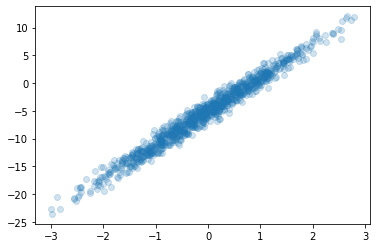

In [16]:
x, y = generate_data(N_EXAMPLES, BETA, INTERCEPT, NOISE)
plt.scatter(x, y, alpha=0.2);

In [17]:
W = tf.Variable(np.random.randn()) # rand init weights (slope)
B = tf.Variable(np.random.randn()) # rand init intercept
print(f'Loss: {loss(x, y, W, B):.5f}')

Loss: 91.62653


In [18]:
for step in range(EPOCHS):
    # direction and vluae of gradient of loss func wrt W and B
    dW, dB = grad(x, y, W, B)
    change_W = dW * ETA
    change_B = dB * ETA
    W.assign_sub(change_W) # e.g. W -= change_W
    B.assign_sub(change_B)
    if step % DISPLAY_STEP == 0:
        print(f'Loss: {loss(x, y, W, B)}')

Loss: 87.6944808959961
Loss: 2.084038019180298
Loss: 1.0709447860717773
Loss: 1.058888554573059
Loss: 1.0587432384490967
Loss: 1.0587414503097534
Loss: 1.0587416887283325
Loss: 1.0587414503097534
Loss: 1.0587414503097534
Loss: 1.0587414503097534


In [19]:
W.numpy(), B.numpy()

(6.027717, -5.0081825)

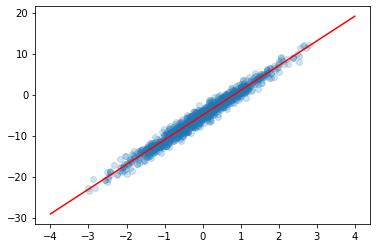

In [20]:
xv = np.linspace(-4, 4, 50)
yv = W.numpy()*xv + B.numpy()

plt.scatter(x, y, alpha=0.2)
plt.plot(xv, yv, 'r-');